In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("student_score-partA5.csv")
df

,hours,scores
0,10,23
1,25,30
2,45,50
3,10,5
4,25,30


In [3]:
df.plot(x = "Hours", y = "Scores", style = "o")
plt.show()

KeyError: 'Hours'

In [4]:
x_mean = df["Hours"].mean() 
y_mean = df["Scores"].mean() 
print(x_mean, y_mean)

5.2 34.0


In [5]:
df["x"] = df["Hours"] - x_mean
df["y"] = df["Scores"] - y_mean
df["x*y"] = df["x"] * df["y"]
df["x^2"] = df["x"] ** 2
df["y^2"] = df["y"] ** 2
df

,Hours,Scores,x,y,x*y,x^2,y^2
0,2,13,-3.2,-21.0,67.2,10.24,441.0
1,2,20,-3.2,-14.0,44.8,10.24,196.0
2,3,23,-2.2,-11.0,24.2,4.84,121.0
3,5,43,-0.2,9.0,-1.8,0.04,81.0
4,6,34,0.8,0.0,0.0,0.64,0.0
5,7,36,1.8,2.0,3.6,3.24,4.0
6,8,42,2.8,8.0,22.4,7.84,64.0
7,3,44,-2.2,10.0,-22.0,4.84,100.0
8,7,53,1.8,19.0,34.2,3.24,361.0
9,9,32,3.8,-2.0,-7.6,14.44,4.0


In [6]:
summation_x_y = df["x*y"].sum()
summation_x_squared = df["x^2"].sum()
summation_y_squared = df["y^2"].sum()

In [7]:
print(summation_x_y, summation_x_squared, summation_y_squared)

165.0 59.6 1372.0


In [9]:
correlation = summation_x_y / (summation_x_squared * summation_y_squared) ** 0.5
correlation

0.577010556424687

In [10]:
def getMean(numbers):
    if len(numbers) == 0:
        return None
    else:
        current_sum = 0
        for i in numbers:
            current_sum += i
            current_avg = current_sum / len(numbers)
        return current_avg

In [11]:
def getStandardDeviation(numbers):
    if len(numbers) == 0:
        return 0
    else:
        mean = getMean(numbers)
        std_deviation = 0
        for i in numbers:
            std_deviation += (i - mean) ** 2
        return (std_deviation / len(numbers)) ** 0.5

In [12]:
std_deviation_x = getStandardDeviation(df["x"].tolist())
std_deviation_y = getStandardDeviation(df["y"].tolist())
print(std_deviation_x, std_deviation_y)

2.4413111231467406 11.713240371477058


In [13]:
m = correlation * (std_deviation_y / std_deviation_x)
m

2.7684563758389267

In [14]:
c = df["Scores"].mean() - m * df["Hours"].mean()
c

19.60402684563758

In [15]:
df["y_prediction"] = m * df["Hours"] + c

In [16]:
df

,Hours,Scores,x,y,x*y,x^2,y^2,y_prediction
0,2,13,-3.2,-21.0,67.2,10.24,441.0,25.140940
1,2,20,-3.2,-14.0,44.8,10.24,196.0,25.140940
2,3,23,-2.2,-11.0,24.2,4.84,121.0,27.909396
3,5,43,-0.2,9.0,-1.8,0.04,81.0,33.446309
4,6,34,0.8,0.0,0.0,0.64,0.0,36.214765
5,7,36,1.8,2.0,3.6,3.24,4.0,38.983221
6,8,42,2.8,8.0,22.4,7.84,64.0,41.751678
7,3,44,-2.2,10.0,-22.0,4.84,100.0,27.909396
8,7,53,1.8,19.0,34.2,3.24,361.0,38.983221
9,9,32,3.8,-2.0,-7.6,14.44,4.0,44.520134


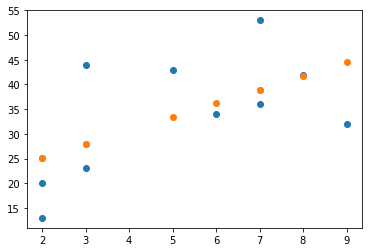

In [17]:
plot1 = plt.scatter(df["Hours"], df["Scores"])
plot2 = plt.scatter(df["Hours"], df["y_prediction"])
plt.show()

In [18]:
df["costVals"] = (df["y_prediction"] - df["Scores"]) ** 2
df

,Hours,Scores,x,y,x*y,x^2,y^2,y_prediction,costVals
0,2,13,-3.2,-21.0,67.2,10.24,441.0,25.140940,147.402414
1,2,20,-3.2,-14.0,44.8,10.24,196.0,25.140940,26.429260
2,3,23,-2.2,-11.0,24.2,4.84,121.0,27.909396,24.102169
3,5,43,-0.2,9.0,-1.8,0.04,81.0,33.446309,91.273017
4,6,34,0.8,0.0,0.0,0.64,0.0,36.214765,4.905184
5,7,36,1.8,2.0,3.6,3.24,4.0,38.983221,8.899610
6,8,42,2.8,8.0,22.4,7.84,64.0,41.751678,0.061664
7,3,44,-2.2,10.0,-22.0,4.84,100.0,27.909396,258.907538
8,7,53,1.8,19.0,34.2,3.24,361.0,38.983221,196.470080
9,9,32,3.8,-2.0,-7.6,14.44,4.0,44.520134,156.753761


In [19]:
cost = (df["costVals"].sum()) / 10

In [20]:
cost

91.52046979865773

In [21]:
sse = df["costVals"].sum()

In [22]:
sse

915.2046979865772

In [23]:
y_mean

34.0

In [28]:
df["ssrVals"] = (df["y_prediction"] - y_mean) ** 2

In [29]:
df

,Hours,Scores,x,y,x*y,x^2,y^2,y_prediction,costVals,sseVals,ssrVals
0,2,13,-3.2,-21.0,67.2,10.24,441.0,25.140940,147.402414,78.482951,78.482951
1,2,20,-3.2,-14.0,44.8,10.24,196.0,25.140940,26.429260,78.482951,78.482951
2,3,23,-2.2,-11.0,24.2,4.84,121.0,27.909396,24.102169,37.095457,37.095457
3,5,43,-0.2,9.0,-1.8,0.04,81.0,33.446309,91.273017,0.306574,0.306574
4,6,34,0.8,0.0,0.0,0.64,0.0,36.214765,4.905184,4.905184,4.905184
5,7,36,1.8,2.0,3.6,3.24,4.0,38.983221,8.899610,24.832496,24.832496
6,8,42,2.8,8.0,22.4,7.84,64.0,41.751678,0.061664,60.088510,60.088510
7,3,44,-2.2,10.0,-22.0,4.84,100.0,27.909396,258.907538,37.095457,37.095457
8,7,53,1.8,19.0,34.2,3.24,361.0,38.983221,196.470080,24.832496,24.832496
9,9,32,3.8,-2.0,-7.6,14.44,4.0,44.520134,156.753761,110.673224,110.673224


In [30]:
ssr = df["ssrVals"].sum()  

In [31]:
ssr

456.79530201342294

In [32]:
df["sstVals"] = (df["y"] - y_mean) ** 2
df

,Hours,Scores,x,y,x*y,x^2,y^2,y_prediction,costVals,sseVals,ssrVals,sstVals
0,2,13,-3.2,-21.0,67.2,10.24,441.0,25.140940,147.402414,78.482951,78.482951,3025.0
1,2,20,-3.2,-14.0,44.8,10.24,196.0,25.140940,26.429260,78.482951,78.482951,2304.0
2,3,23,-2.2,-11.0,24.2,4.84,121.0,27.909396,24.102169,37.095457,37.095457,2025.0
3,5,43,-0.2,9.0,-1.8,0.04,81.0,33.446309,91.273017,0.306574,0.306574,625.0
4,6,34,0.8,0.0,0.0,0.64,0.0,36.214765,4.905184,4.905184,4.905184,1156.0
5,7,36,1.8,2.0,3.6,3.24,4.0,38.983221,8.899610,24.832496,24.832496,1024.0
6,8,42,2.8,8.0,22.4,7.84,64.0,41.751678,0.061664,60.088510,60.088510,676.0
7,3,44,-2.2,10.0,-22.0,4.84,100.0,27.909396,258.907538,37.095457,37.095457,576.0
8,7,53,1.8,19.0,34.2,3.24,361.0,38.983221,196.470080,24.832496,24.832496,225.0
9,9,32,3.8,-2.0,-7.6,14.44,4.0,44.520134,156.753761,110.673224,110.673224,1296.0


In [34]:
sst = ssr + sse
sst

1372.0000000000002

In [35]:
rSquared = 1 - (sse / sst)
rSquared

0.33294118222552693